# Analytics II
## Natural Language Processing



1.   Introduction
2.   Working with String
3.   Feature Extraction / Representation
4.   Feature Expansion
5.   Sentiment Analysis


In [ ]:
# Amazon_reviews
# DataSet: https://nijianmo.github.io/amazon/index.html
import pandas as pd

amazon_reviews_df = pd.read_json('http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Magazine_Subscriptions.json.gz', compression = 'gzip', lines = True)
amazon_reviews_df.head()

# reviewerID - ID of the reviewer, e.g. AH2IFH762VY5U
# asin - ID of the product, e.g. B00005N7P0
# reviewerName - name of the reviewer e.g. ted sedlmayr	
# vote - helpful votes of the review
# style - a dictionary of the product metadata, e.g., "Format" is "Hardcover"
# reviewText - text of the review
# overall - rating of the product
# summary - summary of the review
# unixReviewTime - time of the review (unix time)
# reviewTime - time of the review (raw)
# image - images that users post after they have received the product

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


## Question 1

- How many observations are in amazon_reviews_df? How many features to we have?
- What are the label?
- What are the proportions of the label categories? - hint: use 

```
len(DataFrame)
```

print the answers as string

## Solution 1

In [ ]:
# How many observations and features
metadata = amazon_reviews_df.shape
print(metadata)

(89689, 12)


In [ ]:
print("There are "+str(metadata[0])+" observations with "+str(metadata[1])+" features in the dataset.")
print(f"There are {str(metadata[0])} observations with {str(metadata[1])} features in the dataset.")
print("There are {} observations with {} features in the dataset.".format(str(metadata[0]),str(metadata[1])))

There are 89689 observations with 12 features in the dataset.
There are 89689 observations with 12 features in the dataset.
There are 89689 observations with 12 features in the dataset.


In [ ]:
# What are the labels
overall = amazon_reviews_df['overall'].unique()
print(overall)

vote = amazon_reviews_df['vote'].unique()
print(vote)

print(f"The label variable is 'overall'.")

[5 3 4 2 1]
['9' '14' '13' nan '2' '290' '19' '24' '7' '25' '10' '15' '5' '12' '8' '6'
 '3' '31' '17' '21' '23' '4' '16' '87' '20' '98' '22' '30' '11' '35' '101'
 '160' '69' '88' '29' '18' '27' '44' '33' '38' '55' '28' '115' '77' '60'
 '63' '46' '92' '61' '260' '91' '26' '43' '108' '81' '94' '37' '36' '266'
 '243' '56' '41' '39' '229' '52' '326' '89' '68' '42' '445' '34' '58' '59'
 '51' '124' '106' '159' '95' '32' '99' '40' '114' '130' '275' '72' '164'
 '180' '104' '210' '141' '111' '146' '212' '305' '213' '90' '74' '45'
 '170' '110' '479' '75' '67' '324' '105' '176' '62' '57' '53' '216' '65'
 '153' '276' '49' '121' '86' '66' '272' '408' '654' '144' '560' '161'
 '227' '118' '184' '84' '168' '82' '64' '253' '271' '128' '48' '122' '71'
 '85' '191' '335' '80' '182' '140' '76' '252' '133' '54' '47' '193' '123'
 '117' '129' '456' '314' '155' '50' '78' '107' '138' '280' '196' '262'
 '151' '169' '154' '187' '284' '142' '93' '70' '287' '109' '638' '120'
 '303' '194' '267' '83' '148' '152' '202

In [ ]:
# What are the proportions of the label categories

for category in amazon_reviews_df['overall'].unique():
  print(f"Category {category} has a proportion of {str(len(amazon_reviews_df['overall'][amazon_reviews_df['overall']==category])/len(amazon_reviews_df['overall']))}")

Category 5 has a proportion of 0.5997390984401655
Category 3 has a proportion of 0.07772413562421256
Category 4 has a proportion of 0.141332827883018
Category 2 has a proportion of 0.05823456611178628
Category 1 has a proportion of 0.12296937194081771


## Question 2

- How can we ensure that we have equal proportions of the label category in our data?
- How can we convert the label into a positive / negative sentiment score?
*italicized text*

print the answers as string

## Solution 2

In [ ]:
# We want to create as many 1s as 0s.
# We choose category == 5 as 1 and category == 1 as 0
# Category == 1 occurs less often than category == 5.
# We will choose a random sample from category ==5 in the same amount of reviews as category ==1.

sentiment_list = []
data_df = amazon_reviews_df[['overall','reviewText']][amazon_reviews_df['overall'].isin([1,5])].dropna()

for index, row in data_df.iterrows():
  if row['overall'] ==1:
    sentiment_list.append(0)
  elif row['overall'] ==5:
    sentiment_list.append(1)

data_df['sentiment'] = sentiment_list

In [ ]:
data_df

,overall,reviewText,sentiment
0,5,"for computer enthusiast, MaxPC is a welcome si...",1
1,5,Thank god this is not a Ziff Davis publication...,1
3,5,This beautiful magazine is in itself a work of...,1
4,5,A great read every issue.,1
6,5,I've read Maximum PC (MPC) for many years. The...,1
...,...,...,...
89684,5,This was a nice surprise for my boyfriend. He ...,1
89685,1,Magazine looks like it is printed on recycled ...,0
89686,5,cant go wrong with an SI subscription\nvery pl...,1
89687,5,This magazine is by far my all time favorite o...,1


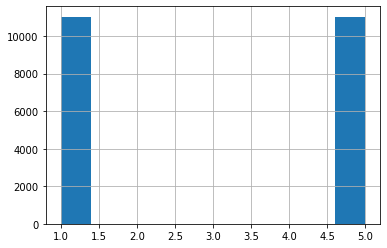

In [ ]:
data_df = pd.DataFrame()
data_df= amazon_reviews_df[amazon_reviews_df['overall']==1]
count_reviews=len(amazon_reviews_df[amazon_reviews_df['overall']==1])
random_sample_df = amazon_reviews_df[amazon_reviews_df['overall']==5].sample(n=count_reviews,replace=False, random_state=42)
data_df=data_df.append(random_sample_df)
data_df['overall'].hist()

In [ ]:
# Convert the label into a positive / negative sentiment score

sentiment_list = []
for index, row in data_df.iterrows():
  if row['overall']==1:
    sentiment_list.append(0)
  elif row['overall']==5:
    sentiment_list.append(1)
  
data_df['sentiment']=sentiment_list

# A simple check to see if the sentiment score is balanced is to take the mean of the variable that should be 0.5

print(f"if the proportion is correct we will see 'True' here : {data_df['sentiment'].mean()==0.5}")

if the proportion is correct we will see 'True' here : True


In [ ]:
data_df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,sentiment
46,1,NaN,False,"02 6, 2012",A90UMUUG7DFCU,B00005N7P0,E. E,First issue I got was June 2010 and last issue...,you will never get 12 issues,1328486400,NaN,NaN,0
71,1,10,True,"01 31, 2004",A1IWT6KM1X8PNS,B00005N7PS,AZS,Unbelievable amount of ads.\nFor $5 a year it ...,At least 90% ads,1075507200,NaN,NaN,0
72,1,31,False,"09 3, 2003",A22X4XUPKF66MR,B00005N7PS,D. H. Richards,When I was in high school Details was a pretty...,"next to no content, but plenty of ads...",1062547200,NaN,NaN,0
73,1,17,False,"07 15, 2003",A1RPTVW5VEOSI,B00005N7PS,Michael J. Edelman,If you're the kind of man who looks at himself...,THE Magazine for the Self-Centered Male,1058227200,NaN,NaN,0
74,1,21,False,"01 16, 2003",AWGAHK04B1SO4,B00005N7PS,butterfly,i bought this magazine subscription for my hus...,Ridiculously Boring Magazine,1042675200,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38162,5,NaN,True,"02 1, 2016",A1GE78P2NKDI3,B00007BK3L,G. M. FIRESTONE,Great way to keep up with world news and other...,Five Stars,1454284800,{'Format:': ' Print Magazine'},NaN,1
73036,5,NaN,True,"02 8, 2016",A2GUGLO85TGNNU,B00YQH98G0,Megan Edmonds,I ordered this for my boyfriend and he loves i...,Excellent articles and journalists,1454889600,NaN,NaN,1
32803,5,NaN,True,"07 28, 2017",A1ROPZX2MQ5V1D,B00006LKH1,Laurie Smith,Love getting this magazine at home,Five Stars,1501200000,{'Format:': ' Print Magazine'},NaN,1
37194,5,NaN,True,"02 27, 2016",A3ECKUOE47QUN8,B00007B10Y,Ana,I love this magazine. My 12 years old also lik...,Nice reading,1456531200,{'Format:': ' Print Magazine'},NaN,1


## Question 3

- Which index has the longest, which one is the shortest review comment in length? - Use a list comprehension. 
- Are there more than one with the same count?
- Take the longest. How many word tokens does it contain? How many sentences? \\
Hint: the index is 64738; use the nltk tokenizers

## Solution 3

In [ ]:
# Which index has the longes, which one is the shortest review in count of symbols
# Longest / Shortest
data_df['length']=[len(str(review)) for review in data_df['reviewText']]
longest_index = data_df.index[data_df['length']==data_df['length'].max()].values[0]
shortest_index = data_df.index[data_df['length']==data_df['length'].min()].values[0]
print(f"The longest review is a index {longest_index}, the shortest has index {shortest_index}.")

The longest review is a index 64738, the shortest has index 11286.


In [ ]:
# Are there more than one with same count

count_longest = len(data_df[data_df['length']==data_df['length'].max()])
count_shortest = len(data_df[data_df['length']==data_df['length'].min()])

print(f"the longest count occurs in {count_longest} reviews, the shortest in {count_shortest} reviews.")

the longest count occurs in 1 reviews, the shortest in 10 reviews.


In [ ]:
# How many word tokens does it contain? How many sentences?

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
text = data_df['reviewText'][data_df.index==longest_index].values[0]

text_wordprocessed = word_tokenize(text)
text_sentprocessed = sent_tokenize(text)

words_count = len(text_wordprocessed)
sentence_count = len(text_sentprocessed)
print(f"The longest review contains {words_count} words and {sentence_count} sentences.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
The longest review contains 3297 words and 98 sentences.


## Question 4

- What word occurs most often in the longest review? \\
Hint: use the CountVectorizer

```
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
```
you can transpose dataframes by


```
data_df.T
```
and you can select a column then by index, which is an integer.

- Filter for stopwords. Does it make sense to do this in the present example? \\
Hint: Use nltk stopwords \\


```
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

```
The Vectorizer needs a string in a list to work. You can reassemble lists to strings by 

```
processed_string= " ".join(processed_list)```
```
- What is the TF-IDF frequency for the most frequent word? Is it a different word than before?

## Solution 4

In [ ]:
# What word occurs most often in the longest review?

#Count occurrences of individual terms over docs in corpus
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#Make sure to transform string to list

longest_list = [data_df['reviewText'][data_df.index==longest_index].values[0]]

countvectorizer = CountVectorizer(analyzer= 'word')
count_wm = countvectorizer.fit_transform(longest_list)

count_tokens = countvectorizer.get_feature_names()

countvect_df = pd.DataFrame(data = count_wm.toarray(), columns = count_tokens)

word = countvect_df.T.sort_values(0,ascending=False)[0].head(1).index[0]

count = countvect_df.T.sort_values(0,ascending=False)[0].head(1)[0]

print(f"the word '{word}' occurs {count} times in the review.")

the word 'the' occurs 147 times in the review.


In [ ]:
# Filter for stopwords. Does it make sense to do this in the present example

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

processed_list = []

for word in longest_list[0].split(" "):
  if word not in STOPWORDS:
    processed_list.append(word)
processed_sentence = " ".join(processed_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# The vectorizer expects a list of individual docs.
# We have only one doc, our longest review.

representation_as_list = list()

representation_as_list.append(processed_sentence)

count_wm = countvectorizer.fit_transform(representation_as_list)
count_tokens = countvectorizer.get_feature_names()

countvect_df = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)

word = countvect_df.T.sort_values(0,ascending=False)[0].head(1).index[0]
count = countvect_df.T.sort_values(0,ascending=False)[0].head(1)[0]

print(f"the word '{word}' occurs {count} times in the review.")

the word 'ski' occurs 42 times in the review.


In [ ]:
# What is the Tf-idf frequency for the most frequent word
# Is it different than the one found out from CountVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word')

tfidf_model = tfidfvectorizer.fit_transform(representation_as_list)

tfidf_tokens = tfidfvectorizer.get_feature_names()
tfidf_df = pd.DataFrame(data = tfidf_model.toarray(),columns = tfidf_tokens)
wordfreq_df = tfidf_df.T.sort_values(0, ascending=False).rename(columns={0:'frequency'})
print(f"The word '{wordfreq_df.head(1).index[0]}' has a TF-IDF frequency of {wordfreq_df['frequency'].head(1)[0]}.")

The word 'ski' has a TF-IDF frequency of 0.43294367938410694.


## Question 5
- Parse two dataframes that contain:
1. Words from all reviews with either sentiment =0 or =1 \\
2. Adjectives
3. Not stopwords 
4. Lemmas
5. TF-IDF Frequencies 

Hint: use spacy; for a glossary you can treat ALL reviews as ONE corpus
```
import spacy
nlp = spacy.load("en_core_web_sm")
```

You check for Adjectives and stopwords in one logic check:

```
token.pos_ == 'ADJ' and token.is_stop is not True
```




## Solution 5

In [ ]:
import spacy 
nlp = spacy.load("en_core_web_sm")

In [ ]:
%%time
# We are building a corpus across all reviews, so our doc IS actually all reviews. 
negative_df = data_df[data_df['sentiment']==0]

# We iterate through all reviews, spacy-parse them and extract adverbs.

negative_adjective_list = []
for index, row in negative_df.iterrows():
  doc = nlp(str(row['reviewText']))
  
  for token in doc:
    if token.pos_ == 'ADJ' and token.is_stop is not True:
      negative_adjective_list.append(token.lemma_)

negative_string = " ".join(negative_adjective_list)

CPU times: user 11min, sys: 8.64 s, total: 11min 8s
Wall time: 11min 9s


In [ ]:
%%time
# We are building a corpus across all reviews, so our doc IS actually all reviews. 
positive_df = data_df[data_df['sentiment']==1]

# We iterate through all reviews, spacy-parse them and extract Adjective. 

positive_adjective_list = []
for index, row in positive_df.iterrows():
  doc = nlp(str(row['reviewText']))
  
  for token in doc:
    if token.pos_ == 'ADJ' and token.is_stop is not True:
      positive_adjective_list.append(token.lemma_)

positive_string = " ".join(positive_adjective_list)

CPU times: user 10min 13s, sys: 8.34 s, total: 10min 22s
Wall time: 10min 22s


In [ ]:
# Now process the data with the tf-idf vectorizer

positive_list = []
positive_list.append(positive_string)

tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_model = tfidfvectorizer.fit_transform(positive_list)
tfidf_tokens = tfidfvectorizer.get_feature_names()
tfidf_df = pd.DataFrame(data = tfidf_model.toarray(),columns = tfidf_tokens)
pos_df = tfidf_df.T.sort_values(0, ascending=False).rename(columns={0:'frequency'})

negative_list = []
negative_list.append(negative_string)

tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_model = tfidfvectorizer.fit_transform(negative_list)
tfidf_tokens = tfidfvectorizer.get_feature_names()
tfidf_df = pd.DataFrame(data = tfidf_model.toarray(),columns = tfidf_tokens)
neg_df = tfidf_df.T.sort_values(0, ascending=False).rename(columns={0:'frequency'})

## Question 6 (NOT RELEVANT FOR EXAM)

- Create a simple classifier and predict the sentiment for the Review with Index 64738

## Solution 6

In [ ]:
def sentiment_analyzer(text):
  score_list = list()
  doc = nlp(text)
  for token in doc:
    if token.pos_ == 'ADJ' and token.is_stop is not True:
      try:
        pos_score = pos_df['frequency'][pos_df.index==token.lemma_].values[0]
      except IndexError:
        pos_score = 0
      try:
        neg_score = neg_df['frequency'][neg_df.index==token.lemma_].values[0]
      except IndexError:
        neg_score = 0
      if pos_score == neg_score:
        score_list.append(0)
      elif pos_score > neg_score:
        score_list.append(1)
      elif pos_score < neg_score:
        score_list.append(-1)

  return sum(score_list)/len(score_list)    

In [ ]:
index = 64738

predicted_sentiment = sentiment_analyzer(data_df['reviewText'][index])
actual_sentiment = data_df['sentiment'][index]

if predicted_sentiment > 0 and actual_sentiment == 1:
  result = "True Positive"
elif predicted_sentiment < 0 and actual_sentiment == 0:
  result = "True Negative"
elif predicted_sentiment > 0 and actual_sentiment == 0:
  result = "False Positive"
elif predicted_sentiment < 0 and actual_sentiment == 1:
  result = 'False Negative'

print(f"Index {index} is a {result}: it has predicted sentiment {predicted_sentiment} and actual sentiment {actual_sentiment} ")

Index 64738 is a True Negative: it has predicted sentiment -0.6395939086294417 and actual sentiment 0 
